<a href="https://colab.research.google.com/github/keith-leung/cis667/blob/master/States_and_Actions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.special import comb
print(comb(3,1))

3.0


In [ ]:
#@title
"""
Example:
Add code to return the size of the frontier at each iteration of the while loop
"""
def reachable_states(valid_actions, perform_action, initial_state):
    frontier = set([initial_state])
    explored = set()
    while len(frontier) > 0:
        state = frontier.pop()
        explored.add(state)
        for action in valid_actions(state):
            new_state = perform_action(state, action)
            if new_state not in explored and new_state not in frontier:
                frontier.add(new_state)
    return explored


In [ ]:
"""
Bottle states are represented by tuples (l0, l1, l2, l3,...)
lb is the number of liters currently in the bth bottle
Actions are "fill b", "dump b", and "pour b1 into b2" for each b.
Examples:
1. Finish implementing perform_action where indicated by # TODO
2. Fix bug in valid_actions
"""

# Max capacity of each bottle
capacities = (5, 3)

def valid_actions(state):
    bottles = range(len(state))
    fills = ["fill %d"%b for b in bottles]
    empty = ["dump %d"%b for b in bottles]
    pours = ["pour %d into %d"%(b1,b2)
      for b1 in bottles for b2 in bottles
      if b1 != b2]
    return fills + empty + pours

def perform_action(state, action):
    new_state = list(state)
    if action[:4] == "fill":
        b = int(action[5:]) # bottle to fill
        new_state[b] = capacities[b]
    if action[:4] == "dump":
        b = int(action[5:]) # bottle to dump
        # TODO: update new_state here
        new_state[b] = 0
    if action[:4] == "pour":
        b1, b2 = map(int, action[5:].split(" into ")) # pour b1 into b2
        # TODO: update new_state here
        diff = capacities[b2] - state[b2]
        howmuch = state[b1]
        volume = min(diff, howmuch)
        new_state[b1] = state[b1] - volume
        new_state[b2] = state[b2] + volume
        #if new_state[b1] <= diff:
        #  new_state[b2] += new_state[b1]
        #  new_state[b1] = 0
        #else:
    return tuple(new_state)

plan = ["fill 0", "pour 0 into 1"]
state = (0, 0)
print(state)
for action in plan:
    print(action)
    state = perform_action(state, action)
    print(state)

# from graph_search import reachable_states
states = reachable_states(
    valid_actions,
    perform_action,
    initial_state=(0,0))
print("reachable state counts:")
for i,s in enumerate(states): print("%d: %s" % (i,s))



(0, 0)
fill 0
(5, 0)
pour 0 into 1
(2, 3)
reachable state counts:
0: (0, 1)
1: (0, 0)
2: (1, 3)
3: (3, 3)
4: (3, 0)
5: (1, 0)
6: (4, 0)
7: (2, 0)
8: (2, 3)
9: (5, 0)
10: (4, 3)
11: (5, 1)
12: (0, 3)
13: (5, 2)
14: (0, 2)
15: (5, 3)


In [ ]:
s = [2,3]
s[1] = 0
print(s)

[2, 0]


In [ ]:
  state = (2,3,2)
  bottles = list(range(len(state)))
  print(bottles)
  fills = ["fill %d"%b for b in bottles]
  print(fills)
  pours = ["pour %d into %d"%(b1,b2) for b1 in bottles for b2 in bottles]
  pours = ["pour %d into %d"%(b1,b2)
      for b1 in bottles for b2 in bottles
      if b1 != b2]
  pours = ["pour %d into %d"%(b1,b2)
      for b1 in bottles for b2 in bottles
      if b1 != b2]
  pours = ["pour %d into %d"%(b1,b2)
      for b1 in bottles for b2 in bottles[b1+1:]
      if b1 != b2]
  print(pours)
  

[0, 1, 2]
['fill 0', 'fill 1', 'fill 2']
['pour 0 into 1', 'pour 0 into 2', 'pour 1 into 2']


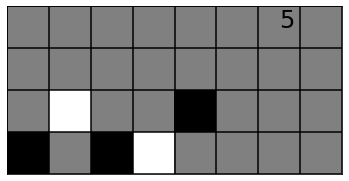

(0, 6, 5)
(1, 0)
(1, 6, 5)


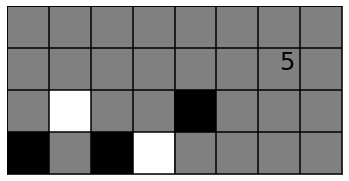

(-1, 0)
(0, 6, 5)


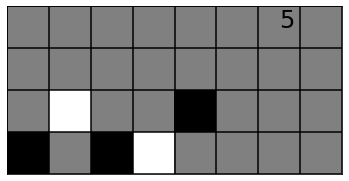

(1, 0)
(1, 6, 5)


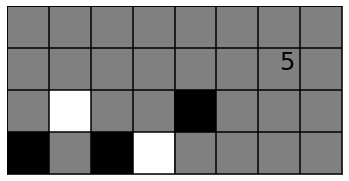

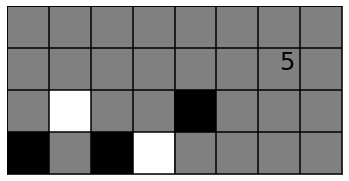

NameError: ignored

In [ ]:
"""
Roomba state is (r, c, p) for row, column, and power level
Actions are (dr, dc) for one step up, down, left, or right
For example, (1, 0) moves down one row and stays in the same column
Examples:
1. Update valid_actions to include left/right motions
2. Update valid_actions and perform_action to model power loss
    a. No actions are valid when power is 0
    b. Every action reduces power by 1
    c. If roomba is at a charging station in a new state, its power is restored to max_power
3. Add code at the end of __main__ to count the reachable states where roomba's power is exactly 2
"""
import numpy as np
import matplotlib.pyplot as pt

# random grid world with wall (0), open (1), charge (2) cells
num_rows, num_cols = 4, 8 # num rows and cols
grid = np.ones((num_rows, num_cols))
walls = np.random.rand(*grid.shape) < .1 
chargers = np.random.rand(*grid.shape) < .1 
grid[walls] = 0
grid[chargers] = 2
max_power = 5

# # deterministic grid world
# num_rows, num_cols = 4, 8
# grid = np.ones((num_rows, num_cols))
# grid[-1,:int(num_cols/2)] = 0 # wall
# grid[2, 2] = 2 # charger
# max_power = 3

def showgrid(state):
    r, c, p = state
    pt.imshow(grid, cmap='gray', vmin=0, vmax=2)
    for col in range(num_cols+1): pt.plot([col-.5, col-.5], [-.5, num_rows-.5], 'k-')
    for row in range(num_rows+1): pt.plot([-.5, num_cols-.5], [row-.5, row-.5], 'k-')
    pt.text(c, r, str(p), fontsize=24)
    pt.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

def valid_actions(state):
    r, c, p = state
    actions = []
    ### TODO: add code to deal with zero power
    if r > 0 and grid[r-1,c] > 0: actions.append((-1, 0))
    if r < num_rows-1 and grid[r+1,c] > 0: actions.append((1, 0))
    ### TODO: add code for column (c) boundaries
    return actions

def perform_action(state, action):
    r, c, p = state
    dr, dc = action
    ### TODO: add code to deal with drainage and recharging
    new_state = (r+dr, c+dc, p)
    return new_state

if __name__ == "__main__":
    
    positions = list(zip(*np.nonzero(grid)))
    r, c = positions[np.random.randint(len(positions))]
    state = (r, c, max_power)

    pt.ion()
    pt.figure()
    showgrid(state)
    pt.show()
    print(state)
    for t in range(3):
        actions = valid_actions(state)
        if len(actions) == 0: break
        action = actions[np.random.randint(len(actions))]
        print(action)
        state = perform_action(state, action)
        print(state)
        pt.cla()
        showgrid(state)
        pt.pause(.5)
        pt.show()
    
    pt.ioff()
    showgrid(state)
    pt.show()

    # from graph_search import reachable_states
    states = reachable_states(
        valid_actions,
        perform_action,
        initial_state=state)
    
    print(len(states))

    # ### TODO: count the reachable states with power == 2


[[[[0 3 2]
   [0 3 1]]

  [[0 4 2]
   [0 4 1]]]


 [[[5 3 2]
   [5 3 1]]

  [[5 4 2]
   [5 4 1]]]]


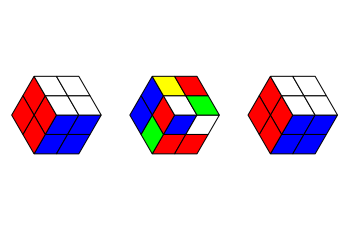

Searching reachable states...
3674160


In [ ]:
"""
2x2x2 rubiks cube
state is a 2x2x2x3 char array
first 3 dimensions are positions on the cube
last dimension is the colors in each of the 3 spatial directions
spatial directions are 0:x, 1:y, 2:z
"""
import numpy as np
import matplotlib.pyplot as pt
from matplotlib.patches import Polygon

R, G, B, W, Y, O = range(6)
colors = {
    R: (1.,0.,0.), # red
    G: (0.,1.,0.), # green
    B: (0.,0.,1.), # blue
    W: (1.,1.,1.), # white
    Y: (1.,1.,0.), # yellow
    O: (1.,.64,0.), # orange
}

def unhash(state):
    return np.frombuffer(state, dtype=np.byte).reshape((2,2,2,3))
def rehash(state):
    return state.tobytes()

def showcube(state):
    state = unhash(state)
    ax = pt.gca()
    angles = -np.arange(3) * np.pi * 2 / 3
    axes = np.array([np.cos(angles), np.sin(angles)])
    for d in range(3):
        for a, b in [(0,0),(0,1),(1,0),(1,1)]:
            xy = [a*axes[:,d] + b*axes[:,(d+1) % 3],
                (a+1)*axes[:,d] + b*axes[:,(d+1) % 3],
                (a+1)*axes[:,d] + (b+1)*axes[:,(d+1) % 3],
                a*axes[:,d] + (b+1)*axes[:,(d+1) % 3]]
            c = colors[state[tuple(np.roll((a,b,0),d))+((d+2) % 3,)]]
            ax.add_patch(Polygon(xy, facecolor=c, edgecolor='k'))
    pt.xlim(2*axes[0,:].min(), 2*axes[0,:].max())
    pt.ylim(2*axes[1,:].min(), 2*axes[1,:].max())
    ax.axis('equal')
    ax.axis('off')

def valid_actions(state):
    return [0, 1, 2] # which spatial direction to spin

def perform_action(state, action):
    new_state = unhash(state).copy()
    # rotate cubie positions
    index = [slice(None)]*4
    index[action] = 1
    new_state[tuple(index)] = np.rot90(new_state[tuple(index)], axes=(0,1))
    # rotate cubies
    swap = [d for d in range(3) if d != action]
    new_state[tuple(index[:3])+(swap,)] = new_state[tuple(index[:3])+(swap[::-1],)]
    return rehash(new_state)

if __name__ == "__main__":
    
    solved = np.zeros((2,2,2,3),dtype=np.byte)
    solved[0,:,:,0] = R
    solved[1,:,:,0] = O
    solved[:,0,:,1] = W
    solved[:,1,:,1] = Y
    solved[:,:,1,2] = G
    solved[:,:,0,2] = B
    print(solved)
    solved = rehash(solved)
    
    pt.subplot(1,3,1)
    showcube(solved)
    
    state = solved
    plan = [0, 1, 2]
    for action in plan:
        state = perform_action(state, action)
    pt.subplot(1,3,2)
    showcube(state)

    for action in np.repeat(plan[::-1], 3):
        state = perform_action(state, action)
    pt.subplot(1,3,3)
    showcube(state)
    pt.show()
    
    # from graph_search import reachable_states
    print("Searching reachable states...")
    states = reachable_states(valid_actions, perform_action, solved)
    print(len(states))
